# Dinosaur Fossil Recorde Insights

## 1.	Introduction
The national museum of natural history has recently created a database containing all dinosaur records of past field campaigns. The objective of this project is to uncover interesting insights to enhance the museum's understanding of its fossil collection and provide recommendations for data quality improvement. [1]

### 1.1 Stakeholder Requests
Each request is addressed in **Results Sections 3.1 to 3.5**, with each section corresponding to its specific question number.
1. How many different dinosaur names are present in the data? <p style="color: purple;">The dataset comprises 4,951 records, representing **1,042 unique dinosaur names** illustrating the **biodiversity of the Mesozoic Era**.</p>
2. Which was the largest dinosaur? What about missing data in the dataset?<p style="color: purple;">
There are **four Supersaurus and one Argentinosaurus** from the **Sauropod** dinosaur type, which are the largest dinosaurs, measuring **35 meters** in length. **Sauropods** tend to have significantly larger bodies compared to other types.</p>
3. What dinosaur type has the most occurrences in this dataset? <p style="color: purple;">The **Ornithopod** type with **904** records (**18.3%** of all records) has the most occurrences in this dataset, **Followed closely by large and small Theropods** and **Saurapods**. </br> **Ceratopsian** and **Armored Dinosaur** have the **lowest frequency**.</p>
4. Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.<p style="color: purple;">There is a **weak although statically significant positive correlation** (0.31) between the age of dinosaurs and their body size, indicating that larger dinosaurs are generally associated with older geological periods. This suggests that over time, the length of dinosaurs has **decreased**. However, a more fine-tuned **analysis of each specific dinosaur type** reveals **divergent evolutionary trends**. For example, Ceratopsians, Sauropods, and Ornithopods grew larger over time, while both large and small Theropods and Armored Dinosaurs exhibited a trend of becoming smaller.
</p>

5. Create an interactive map showing each record.<p style="color: purple;">See section 3.5 from Results section</p>

 [1]*This project is based on a competition I participated in through DataCamp.*


### 1.2 Other Key Findings
1. This dataset contains **missing values** in several key columns, with the 'family' column showing missing data in 29.4% of the records. This represents a **significant gap**, particularly in the **'type', 'family', 'length_m'**, and **'diet'** columns. In the recommendation section, we propose strategies to address this issue. While it is likely that the missing data occurs at random, missingness exceeding 15% introduces a higher risk of bias if simple imputation methods are applied, as the imputed values may not accurately reflect the true distribution. Despite this, we employed various imputation techniques tailored to the specific needs and characteristics of each column to minimize the number of missing records
2. The hierarchy of dinosaur categories is structured as follows. The number next to each level indicates the count of unique values within that category in our dataset.

<img src="./class-hierarchy.png" alt="Dinosaur Hierarchy" width="80"/>

The two dinosaur classes and their respective types are shown below, **Saurischia** with 53% share of total records is dominating the dinosaur class. 
<p align = "center">
<img src="./dinosaurs-categories.jpg" alt="Dinosaur Image" width="700"/>
</p>

3. The dataset encompasses the whole **Mesozoic Era**, also known as the age of reptiles, that began 252.2 million years ago and ended 66 milion years ago, comprising the following periods: 1- **Triassic Period**: 252–201 million years ago 2- **Jurassic Period**: 201–145 million years ago 3- **Cretaceous Period**: 145–66 million years ago </br>

4. As we progress **through geological time**, the **number of records in our dataset increases** significantly. This trend could be attributed to **our enhanced ability to discover fossils** from more recent periods.
5. **Sauropods** are known to be some of **the earliest large dinosaurs**, with fossils dating back to the Late Triassic (around 230 million years ago). **Ceratopsians** are generally **associated with the Late Cretaceous** period, with fossils appearing around 160 million years ago and becoming more prevalent in the last 20 million years of the Cretaceous. The fossil record density for most dinosaur types peaks around 75 million years ago corresponds to the **Late Cretaceous** period when **many dinosaur species thrived and diversified**. **Sauropods** exhibit a different trend, with their peak density occurring approximately **150 million years ago** which aligns with the **Late Jurassic period**, a time when these dinosaurs were particularly abundant.
6. There is a statically significant relationship between 'type' and 'length_m'. Meaning dinosaur type is a determining factor in its body size.
7. While age does play a role in dinosaur size, **other factors** such as environmental changes, predator-prey dynamics and evolutionary pressures likely have a stronger influence on dinosaur body size throughout evolution.
8. The majority of dinosaurs (**~77%**) in this dataset are shorter or equal to 10 meters long.
9. All dinosaurs from **Ornithischia class** are **herbivorous**. **Herbivory** is the most prevalent diet type across all records. </br>
10. **North America** boasts the highest fossil representation in our dataset, with **Alberta, Canada** contributing 13.1% of the total fossils. Additionally, the U.S. states of **Wyoming** and **Montana** follow closely behind, accounting for 10.4% and 9% of the fossil representation, respectively.While areas like **Africa**, **Middle East** and **Russia** have far fewer records in the dataset.



## 2. Data
The dataset containing dinosaur records was collected from the [Paleobiology Database](https://paleobiodb.org/#/). The following table gives a brief description of the columns and key variables.


| Column name | Description |
|---|---|
| occurence_no | The original occurrence number from the Paleobiology Database. |
| name | The accepted name of the dinosaur (usually the genus name, or the name of the footprint/egg fossil). |
| diet | The main diet (omnivorous, carnivorous, herbivorous). |
| type | The dinosaur type (small theropod, large theropod, sauropod, ornithopod, ceratopsian, armored dinosaur). |
| length_m | The maximum length, from head to tail, in meters. |
| max_ma | The age in which the first fossil records of the dinosaur where found, in million years. |
| min_ma | The age in which the last fossil records of the dinosaur where found, in million years. |
| region | The current region where the fossil record was found. |
| lng | The longitude where the fossil record was found. |
| lat | The latitude where the fossil record was found. |
| class | The taxonomical class of the dinosaur (Saurischia or Ornithischia). |
| family | The taxonomical family of the dinosaur (if known). |

*The data was enriched with data from Wikipedia.*

### 2.1 Initial Data Exploration

#### 2.1.1 Import Main Libraries

In [164]:
# Import the main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 2.1.2 Load Data and Initial Exploration

The dinosaurs dataset consists of **4,951 rows** and **12 columns**. Aside from **min_ma** and **max_ma**, which are closely correlated due to both variables representing the age of the dinosaurs, there are no significant correlations among the other numerical variables</br>
</br>
**New Columns**</br>
In this step, we introduce a new column **'mid_ma'** to represent the **average age** of each dinosaur fossil, offering a clearer perspective on the age data rather than focusing solely on the oldest or newest fossil records. Later in the analysis, we will also add a **'period' column**, which will assign each fossil to its corresponding **geological period** based on its age.

In [165]:
# Load the data
dinosaurs = pd.read_csv('dinosaurs.csv')
# Preview the dataframe
dinosaurs

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae
...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1360627,Isaberrysaura,NaN,NaN,NaN,171.6,168.40,Neuquén,-70.263290,-39.205288,Ornithischia,NaN
4947,1363632,Stegosaurus,herbivorous,armored dinosaur,9.0,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,Stegosauridae
4948,1363633,Othnielosaurus,NaN,NaN,NaN,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,NaN
4949,1364695,Iguanodon,herbivorous,ornithopod,10.0,145.0,139.80,Niedersachsen,9.959357,52.341167,Ornithischia,NaN


In [166]:
#Look into each column data type and overview of numerical columns:
print(dinosaurs.info())
dinosaurs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4951 non-null   int64  
 1   name           4951 non-null   object 
 2   diet           3596 non-null   object 
 3   type           3596 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         4951 non-null   float64
 6   min_ma         4951 non-null   float64
 7   region         4909 non-null   object 
 8   lng            4951 non-null   float64
 9   lat            4951 non-null   float64
 10  class          4951 non-null   object 
 11  family         3494 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 464.3+ KB
None


,occurrence_no,length_m,max_ma,min_ma,lng,lat
count,4.951000e+03,3568.000000,4951.000000,4951.000000,4951.000000,4951.000000
mean,6.838323e+05,8.212688,117.518477,106.622270,-37.048675,34.591448
std,3.021524e+05,6.629887,45.270821,44.395885,84.591106,23.961138
min,1.302090e+05,0.450000,70.600000,66.000000,-153.247498,-84.333336
25%,4.871225e+05,3.000000,83.500000,70.600000,-108.258705,36.274439
50%,5.618050e+05,6.700000,99.600000,89.800000,-96.099998,42.611198
75%,8.675665e+05,10.000000,155.700000,145.000000,27.383331,47.745138
max,1.365954e+06,35.000000,252.170000,247.200000,565.000000,78.101875


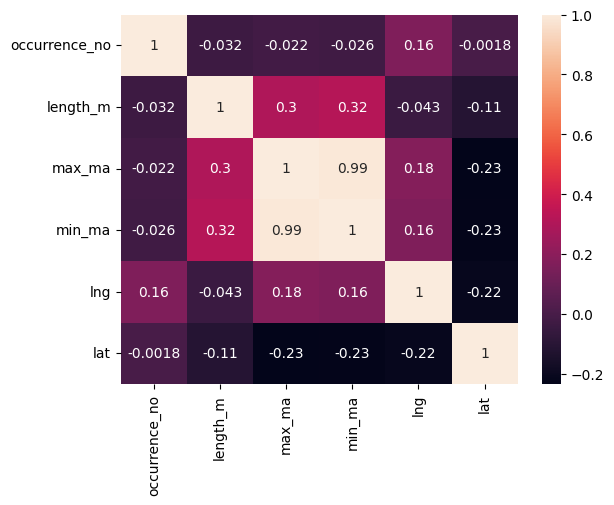

In [167]:
numerical_cols = dinosaurs.select_dtypes(include='number')
sns.heatmap(numerical_cols.corr(),  annot= True)
plt.show()

In [168]:
#Calculate the average age of dinosaurs
dinosaurs['mid_ma'] = (dinosaurs ['max_ma']+ dinosaurs['min_ma'])/2

### 2.2 Duplicated Records
There are no duplicated records in this dataset.

In [169]:
dinosaurs.duplicated().sum()

np.int64(0)

### 2.3 Unique Values
Below we can see the number of unique values for each feature in the dataset.

In [170]:
dinosaurs.nunique()

occurrence_no    4951
name             1042
diet                3
type                6
length_m           71
max_ma             57
min_ma             57
region            287
lng              2472
lat              2423
class               2
family             75
mid_ma            168
dtype: int64

### 2.4 Missing Data
There are **1,355 (27.4% of the total data)** that are **missing values** in **'type', 'length_m' and 'diet' columns**. From these 1,355 records 675 rows are also missing values in 'family column'. </br>
Additionally **'family' column** is missing values for another 482 records (A total of **1,457 records are missing** values for the 'family' column)</br>
In total there are **1383 records missing values in 'length_m'** column.</br>
There are also some data missing in **'region'** column.</br>

Although many records in the dataset have missing values across multiple features simultaneously (such as 'type', 'diet', and 'length_m'), the missingness **does not appear to be related to specific ages or geographic regions**(see **Figure 1** and **Figure 2**). This suggests that the data may be **missing at random (MAR)**, as the missingness seems independent of other observed features.

In [171]:
# Create a DataFrame with missing count and missing percentage
missing_data = dinosaurs.isnull().sum().to_frame(name='Missing Count')
missing_data['Missing Percentage (%)'] = round((dinosaurs.isnull().mean() * 100),2)

# Print the table
print(missing_data)

               Missing Count  Missing Percentage (%)
occurrence_no              0                    0.00
name                       0                    0.00
diet                    1355                   27.37
type                    1355                   27.37
length_m                1383                   27.93
max_ma                     0                    0.00
min_ma                     0                    0.00
region                    42                    0.85
lng                        0                    0.00
lat                        0                    0.00
class                      0                    0.00
family                  1457                   29.43
mid_ma                     0                    0.00


In [172]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


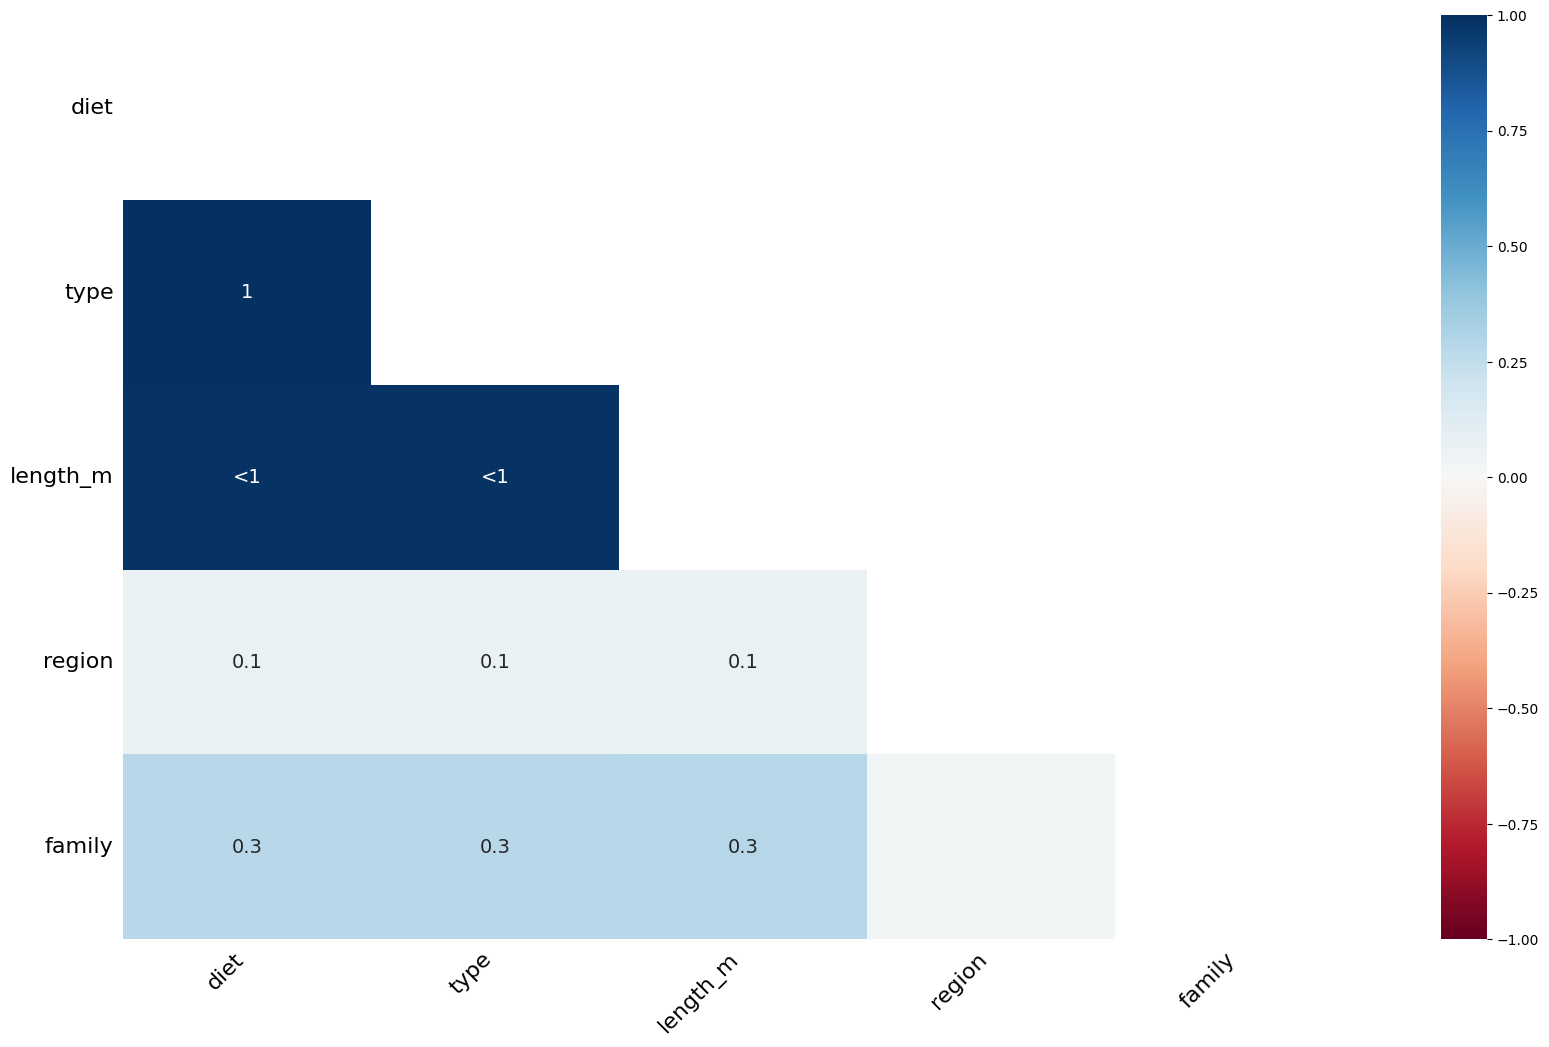

In [173]:
import missingno as msno
# Visualize correlations in missing data
msno.heatmap(dinosaurs)
plt.show()

In [174]:
dinosaurs[(dinosaurs['type'].isna())&~(dinosaurs['length_m'].isna())]

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family,mid_ma


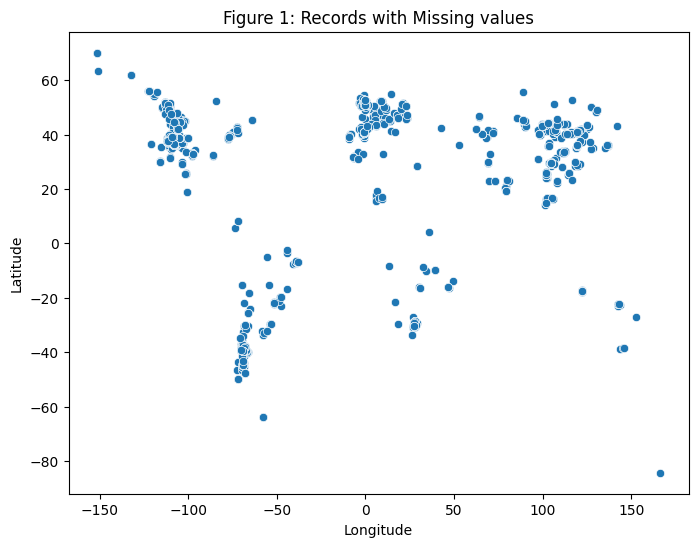

In [175]:
# Filter rows where 'type' is missing
missing_type_data = dinosaurs[dinosaurs['type'].isna()]

# Check if lng and lat columns exist in your dataset (replace with your actual column names)
if 'lng' in missing_type_data.columns and 'lat' in missing_type_data.columns:
    # Create a scatter plot of lng and lat for records with missing 'type'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='lng', y='lat', data=missing_type_data)

    # Adding labels and title
    plt.title("Figure 1: Records with Missing values")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Show the plot
    plt.show()

/tmp/ipykernel_2395/2353566589.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



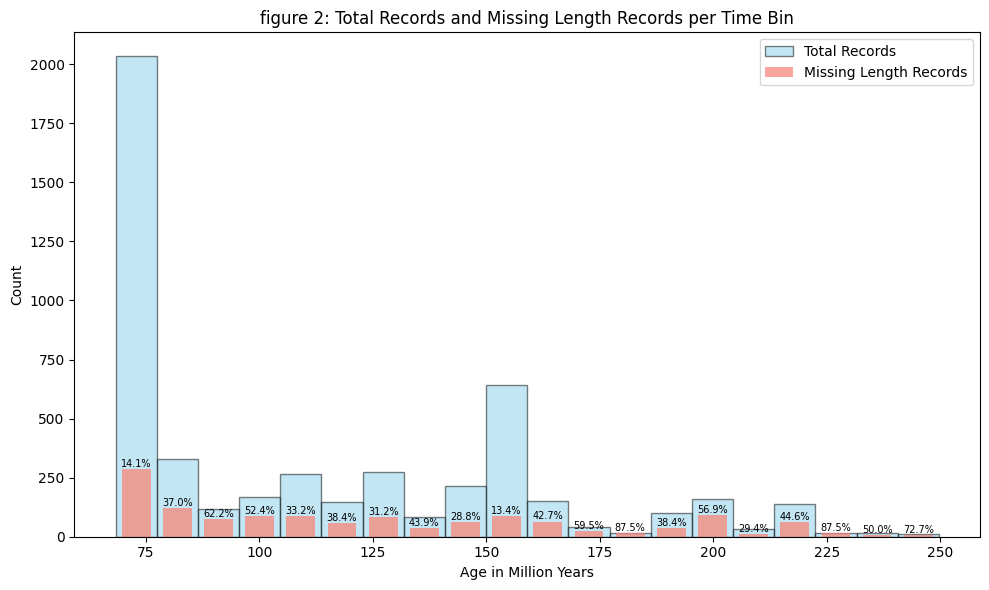

In [176]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram for the total number of records in each bin (mid_ma)
n, bins, patches = ax.hist(dinosaurs['mid_ma'], bins=20, alpha=0.5, label='Total Records', color='skyblue', edgecolor='black')

# Group by the bins and calculate the count of missing length records in each bin
missing_count_per_bin = dinosaurs['length_m'].isnull().groupby(pd.cut(dinosaurs['mid_ma'], bins=bins)).sum()

# Calculate the percentage of missing records for each bin
missing_percentage_per_bin = (missing_count_per_bin / n) * 100

# Plot the missing records per bin as bars
# We use the bin centers (midpoints) to place the bars in line with the histogram
bin_centers = 0.5 * (bins[:-1] + bins[1:])
ax.bar(bin_centers, missing_count_per_bin, alpha=0.7, color='salmon', label='Missing Length Records', width=(bins[1] - bins[0]) * 0.7)

# Add data labels to show the percentage of missing records for each bin
for i in range(len(bin_centers)):
    if n[i] > 0:  # To avoid division by zero for empty bins
        ax.text(bin_centers[i], missing_count_per_bin.iloc[i] + 0.5, f'{missing_percentage_per_bin.iloc[i]:.1f}%', 
                ha='center', va='bottom', fontsize=7, color='black')

# Add labels and title
ax.set_xlabel('Age in Million Years')
ax.set_ylabel('Count')
ax.set_title('figure 2: Total Records and Missing Length Records per Time Bin')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


### 2.5 Pre-Processing

The Dinosauria contains two major groups of dinosaurs: the Ornithischia, or "bird-hipped" dinosaurs, and the Saurischia, or "lizard-hipped" dinosaurs. The most prominent visible difference between the two types of hip is the orientation of the pubis, shown in white in the picture below.</br>

<div style="text-align: center;">
  <img src="./dinohips.jpg" alt="Dinosaur Image" width="400"/>
  
  <em>Picture source: <a href="https://ucmp.berkeley.edu/diapsids/dinomm.html">UC Museum of Paleontology</a></em>
</div>

Except for a few inconsistent records, the dinosaurs classification in the dataset generally follows the below hierarchy structure:</br> 


<img src="./class-hierarchy.png" alt="Dinosaur Hierarchy" width="80"/>

The two dinosaur classes and their respective types are shown below:
<p align = "center">
<img src="./dinosaurs-categories.jpg" alt="Dinosaur Image" width="700"/>
</p>



These categories are further divided into families. Our dataset contains a total of 75 unique family types of dinosaurs. The records with missing family values however, might belong to the families that are not captured in those unique values.</br>
</br>
**Pre-Processing Steps Prior to Analyzing the Data**</br>
</br>
**1. Correct the Class of All Records** </br>
There are two records misclassified under incorrect categories. Those are corrected prior to handling the misising values. </br>
</br>
**2. Type and Family Missing Values** </br>
In this hierarchy there are numerous missing values in columns 'type' and 'family'. Except for the following families {Dromaeosauridae,Herrerasauridae, Ornithomimidae, Troodontidae} that overlap in type between small and large theropods, all families only map to a specific type. So for the records where the 'family' column is known and the 'type' column is missing (except for aformentioned families), we filled in the dinoasur type using the type associated with that specific family.

This is also true for names. Each name can only belong to a specific family, type and class. That is good because we don't have any missing value in names. There could be an effort in completing this dataset just by researching the record names where type and family missing and fill those values. However it cannot be filled in by using only this dataset, because the names with missing values do not correspond to any other record with the same name which has the values filled for type and family categories.

**3. Diet Missing Values** </br>
All known Ornithischian dinosaurs are herbivorous. This group includes a diverse range of species, such as stegosaurs, ankylosaurs, and hadrosaurs, which all primarily fed on plants. They evolved various adaptations for grazing and browsing on vegetation, making them distinct from the carnivorous theropods.

The dataset that we have confirm this fact. since we know the class of all records, the missing diet values for all 'Ornithischia' records are set to 'herbivorous'

**4. Region Missing Values** </br>
Filled in missing 'region' values by identifying the nearest data point with a valid region, considering a proximity of ±5 degrees in both longitude and latitude.

**5. Processing the Remainting Missing Values From These Variables**</br>
Once these values are filled in there are still missing values present in our dataset:</br>
</br>

| Attribute  | Missing Value Count |
|------------|---------------------|
| diet       |         959   |
| type       |         909   |
| length_m   |        1383  |
| region     |         12    |
| family     |        1457  |

All the remaining categorical missing values are replaced by "NULL" to be considerd in the analysis afterward.

**6. Length Missing Values** </br>
After processing all categorical missing values, 909 rows remain where the 'type' category is undetermined, and these are filled with a "NULL" value. For the remaining dataset, where the dinosaur's 'type' is determined (4042 records), we can apply imputation techniques using the median 'length_m' based on dinosaur type to handle the missing values in the 'length_m' column. This approach is justified by several factors: the missing values are missing at random (MAR), approximately 11% (472 out of 4042) of the records have missing data, and the statistical relationship between dinosaur length and type has been shown to be significant. Since the length data is skewed and contains outliers, the median is chosen over the mean for imputation, as it provides a more robust estimate. (see **Figure 3** and **Figure 4**)
 </br>
 </br>
To proceed with the subsequent analysis, particularly for size-related metrics, two datasets were created to facilitate this process:
</br>
 ***dinosaurs_available_length***: This dataset includes only the records without missing values in the 'length_m' column, containing 3568 entries.
***dinosaurs_filled_length***: This dataset comprises the records where missing 'length_m' values were imputed using the median length for each dinosaur type, alongside the records that originally had no missing values, totaling 4042 entries.

**Note:** Other methods like K-nearest neighbors (KNN) has been evaluated to model the length or type of the missing record, however do to lack of number of features available in the dataset and the extent of missing values these models are not accurate enough for filling in the records. 

#### 2.5.1 Correct the Class of All Records

In [177]:
type_class_table = pd.crosstab(dinosaurs['class'], dinosaurs['type'])
print(type_class_table)

type          armored dinosaur  ceratopsian  large theropod  ornithopod  \
class                                                                     
Ornithischia               307          363               1         810   
Saurischia                   0            0             732           1   

type          sauropod  small theropod  
class                                   
Ornithischia         0               0  
Saurischia         665             717  


In [178]:
dinosaurs.loc[(dinosaurs['class'] == 'Ornithischia') & (dinosaurs['type'] == 'large theropod'), 'class'] = 'Saurischia'
dinosaurs.loc[(dinosaurs['class']=='Saurischia') & (dinosaurs['type']=='ornithopod'),'class']='Ornithischia'

#### 2.5.2 Type and Family Missing Values

In [179]:
# Group by 'family' and count the number of unique 'type' values for each family
family_to_type = dinosaurs.groupby('family')['type'].nunique()

# Identify families associated with more than one type
inconsistent_families = family_to_type[family_to_type > 1]
inconsistent_families

family
Dromaeosauridae    2
Herrerasauridae    2
Ornithomimidae     2
Troodontidae       2
Name: type, dtype: int64

In [180]:
x = dinosaurs[dinosaurs['family'].isin(inconsistent_families.index)]
x.groupby('type').nunique()

,occurrence_no,name,diet,length_m,max_ma,min_ma,region,lng,lat,class,family,mid_ma
type,,,,,,,,,,,,
large theropod,168,7,2,5,16,12,23,144,147,1,4,19
small theropod,541,19,1,11,22,21,38,297,288,1,4,34


In [181]:
# List of families to exclude from the fill operation
excluded_families = ["Dromaeosauridae", "Herrerasauridae", "Ornithomimidae", "Troodontidae"]

# Create a mapping of 'family' to 'type' where 'type' is not null and 'family' is not in the excluded list
family_to_type = dinosaurs[~dinosaurs['family'].isin(excluded_families) & dinosaurs['type'].notna()].set_index('family')['type'].to_dict()

# Identify rows where 'type' is NaN, 'family' is not null, and 'family' is not in the excluded list
condition = dinosaurs['type'].isna() & dinosaurs['family'].notna() & ~dinosaurs['family'].isin(excluded_families)

# Use the family-to-type dictionary to fill in the missing 'type' values
dinosaurs.loc[condition, 'type'] = dinosaurs.loc[condition, 'family'].map(family_to_type)

In [182]:
# Group by 'name' and count the number of unique 'type' & 'family' values for each name
name_to_type = dinosaurs.groupby('name')['type'].nunique()
name_to_family = dinosaurs.groupby('name')['family'].nunique()

# Identify names associated with more than one type or family
inconsistent_name_type = name_to_type[name_to_type > 1]
print(inconsistent_name_type)
inconsistent_name_family = name_to_family[name_to_family >1]
print(inconsistent_name_family)

Series([], Name: type, dtype: int64)
Series([], Name: family, dtype: int64)


In [183]:
# Create a mapping of 'name' to 'type' and 'family' where they are not null 
name_to_type = dinosaurs[dinosaurs['type'].notna()].set_index('name')['type'].to_dict()
name_to_family = dinosaurs[dinosaurs['family'].notna()].set_index('name')['family'].to_dict()

# Identify rows where 'type' or 'family' is null and 'name' is not null
condition1 = dinosaurs['type'].isna() & dinosaurs['name'].notna() 
condition2 = dinosaurs['family'].isna() & dinosaurs['name'].notna() 

# Use the name-to-type and name-to-family dictionary to fill in the missing values
dinosaurs.loc[condition1, 'type'] = dinosaurs.loc[condition1, 'name'].map(name_to_type)
dinosaurs.loc[condition2, 'family'] = dinosaurs.loc[condition2, 'name'].map(name_to_family)

#### 2.5.3 Diet Missing Values

In [184]:
diet_class_table = pd.crosstab(dinosaurs['class'], dinosaurs['diet'])
print(diet_class_table)

diet          carnivorous  herbivorous  omnivorous
class                                             
Ornithischia            0         1481           0
Saurischia           1308          595         212


In [185]:
# Fill missing diet values with "herbivorous" where the class is "Ornithischia"
dinosaurs.loc[(dinosaurs['diet'].isna()) & (dinosaurs['class'] == 'Ornithischia'), 'diet'] = 'herbivorous'

#### 2.5.4 Region Missing Values

In [186]:
def fill_region(row, df):
    if pd.isnull(row['region']):
        lat = row['lat']
        lng = row['lng']
        
        # Filter rows where lat and lng are within ±5, and 'region' is not null
        matching_rows = df[(np.abs(df['lat'] - lat) < 5) & 
                           (np.abs(df['lng'] - lng) < 5) & 
                           df['region'].notnull()]
        
        if not matching_rows.empty:
            # Calculate distances between the current row and matching rows
            matching_rows['distance'] = np.sqrt((matching_rows['lat'] - lat)**2 + 
                                                (matching_rows['lng'] - lng)**2)
            
            # Get the row with the minimum distance
            closest_row = matching_rows.loc[matching_rows['distance'].idxmin()]
            
            # Return the region from the closest row
            return closest_row['region']
    
    return row['region']

# Apply the function to each row in the dataset using 'axis=1' for row-wise application
dinosaurs['region'] = dinosaurs.apply(lambda row: fill_region(row, dinosaurs), axis=1)


#### 2.5.5 Processing the Remainting Missing Values From These Variables

In [187]:
missing_data = dinosaurs.isnull().sum().to_frame(name='Missing Count')
missing_data['Missing Percentage (%)'] = round((dinosaurs.isnull().mean() * 100),2)

# Print the table
print(missing_data)

               Missing Count  Missing Percentage (%)
occurrence_no              0                    0.00
name                       0                    0.00
diet                     959                   19.37
type                     909                   18.36
length_m                1383                   27.93
max_ma                     0                    0.00
min_ma                     0                    0.00
region                    12                    0.24
lng                        0                    0.00
lat                        0                    0.00
class                      0                    0.00
family                  1457                   29.43
mid_ma                     0                    0.00


In [188]:
# Replace missing values in the specified categorical columns with 'NULL'
columns_to_fill = ['diet', 'type', 'region', 'family']

# Using fillna() to replace NaN values with 'NULL'
dinosaurs[columns_to_fill] = dinosaurs[columns_to_fill].fillna('NULL')

#### 2.5.6 Length Missing Values

In [189]:
dinosaurs.groupby('type')['length_m'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
NULL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
armored dinosaur,303.0,6.284488,2.028813,1.20,5.0,6.5,8.5,10.0
ceratopsian,355.0,5.692676,3.004977,0.50,2.0,6.0,9.0,9.0
large theropod,732.0,8.860383,3.461690,2.00,6.0,9.0,12.0,18.0
ornithopod,797.0,7.135634,3.378670,0.80,4.0,7.0,10.0,15.0
sauropod,664.0,17.842169,7.704324,2.00,12.0,21.0,23.0,35.0
small theropod,717.0,1.893543,0.684190,0.45,1.5,1.8,2.0,5.0


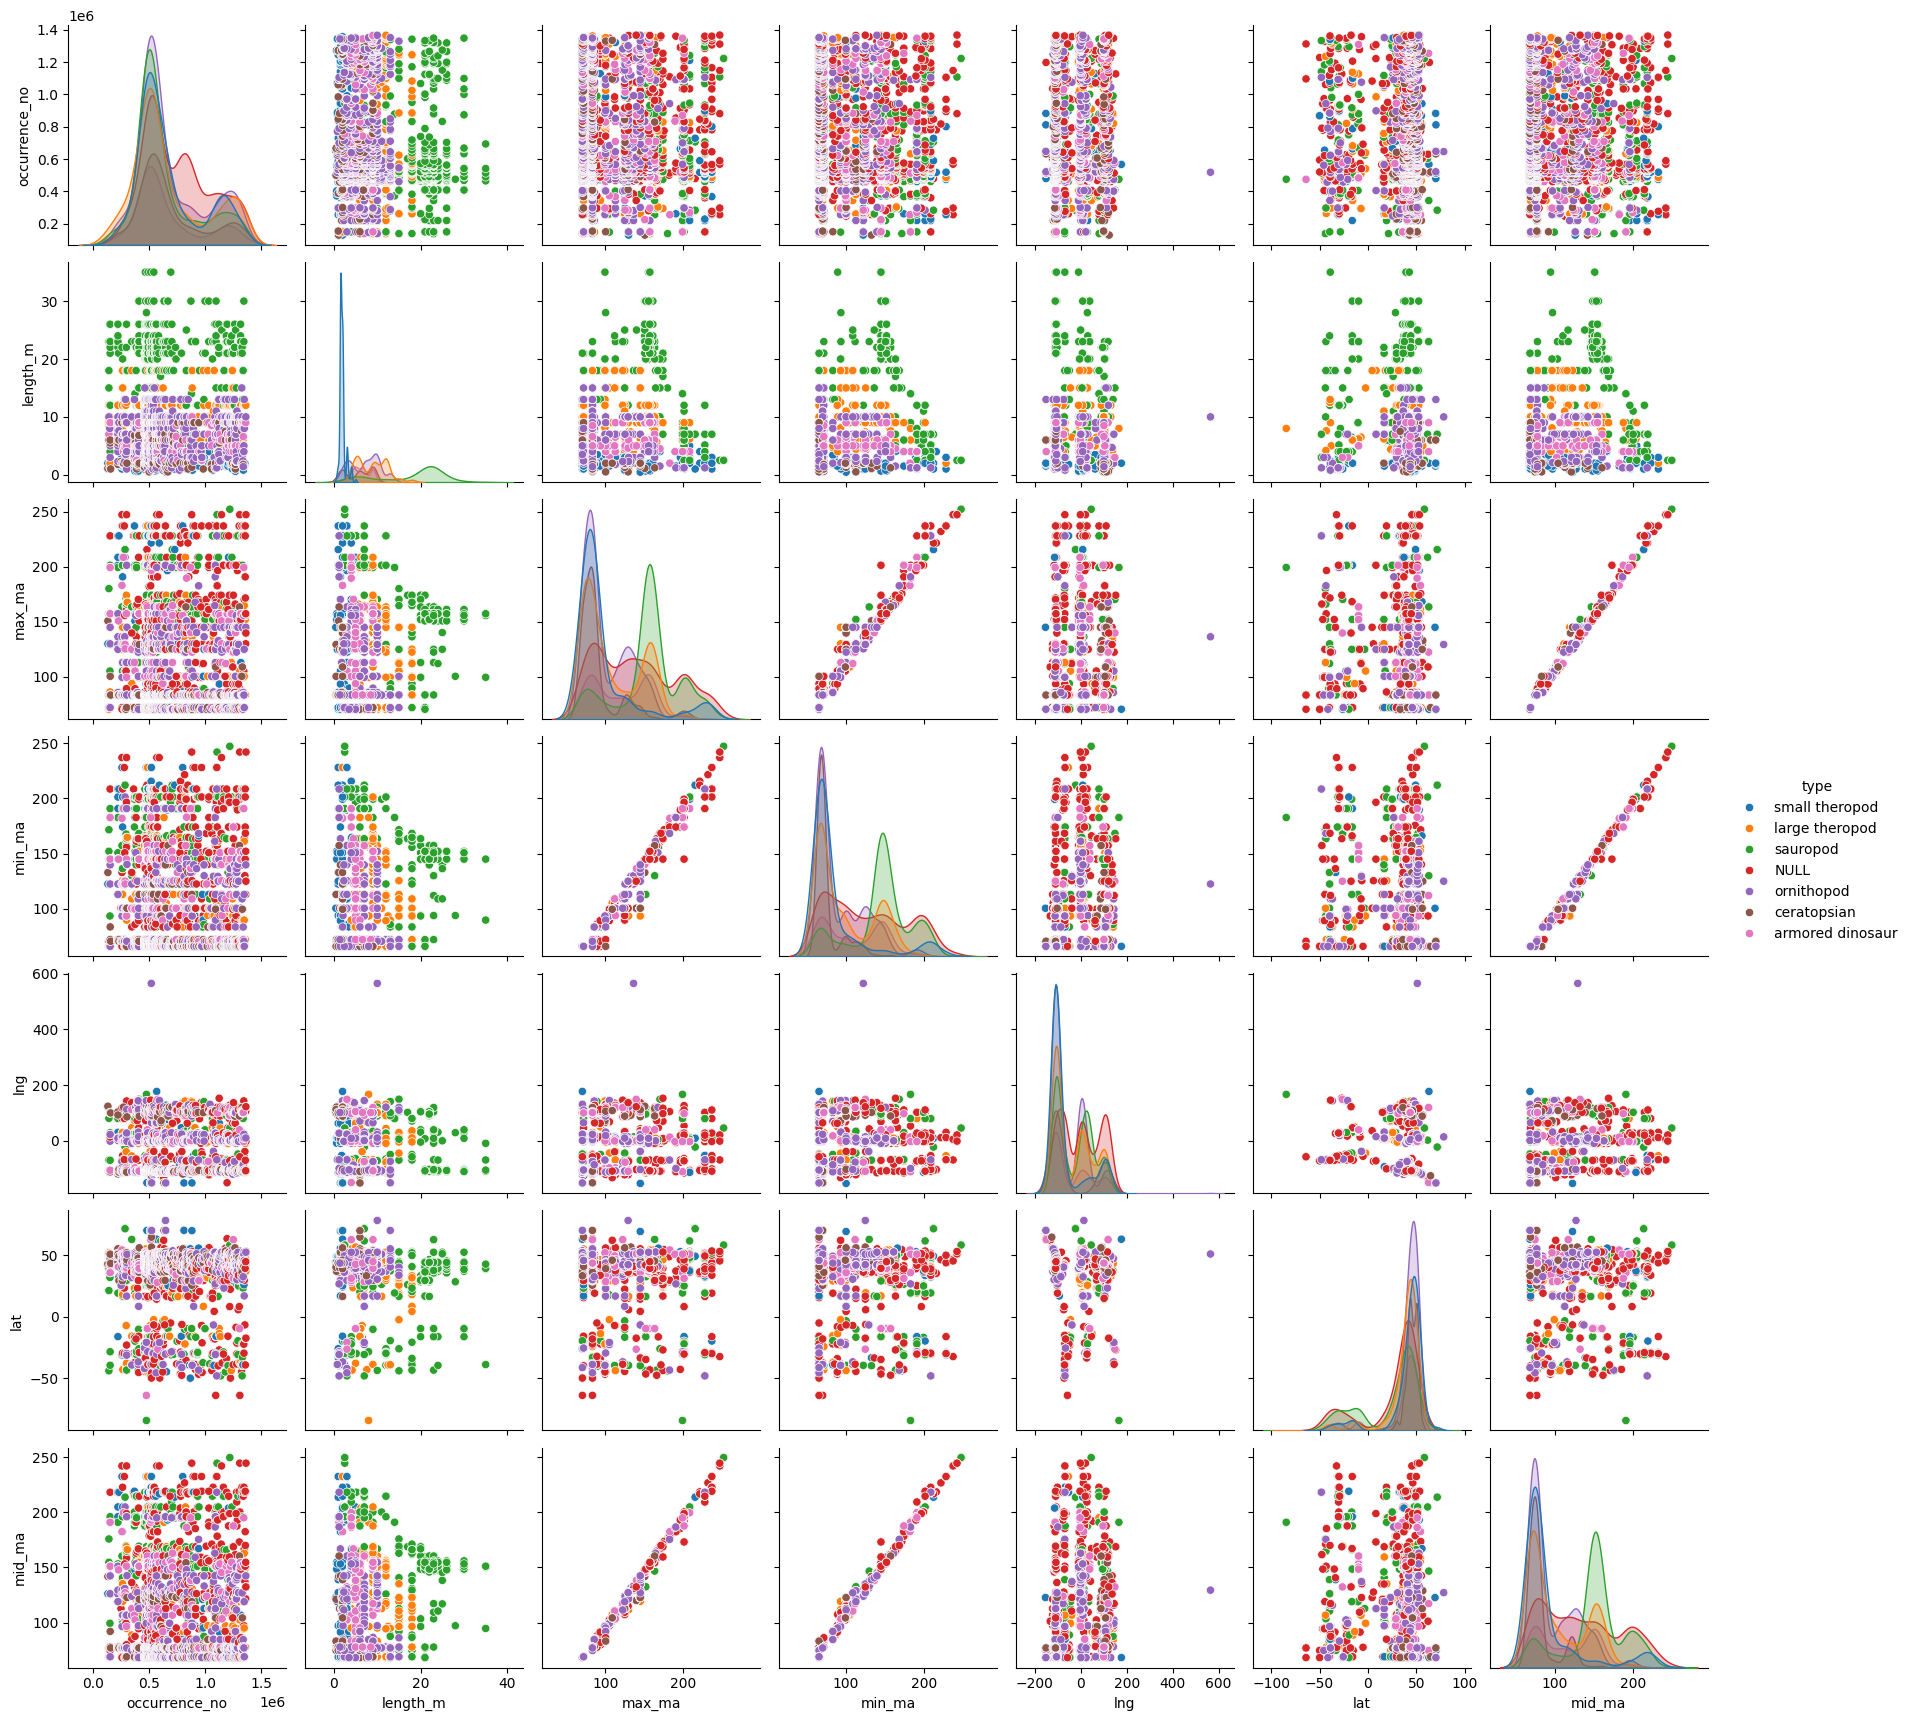

In [190]:
# Pair plot with hue set to type 
sns.pairplot(dinosaurs, hue='type')
plt.show()

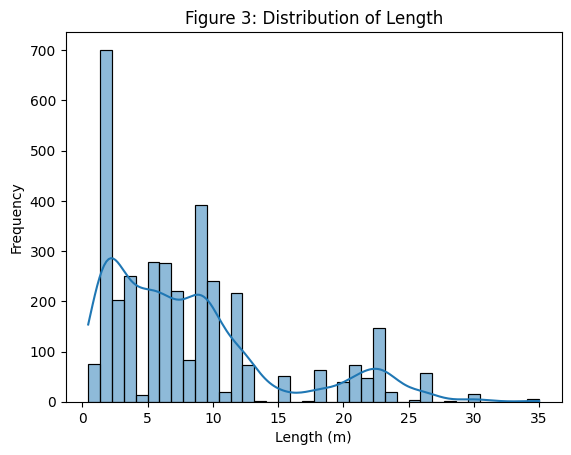

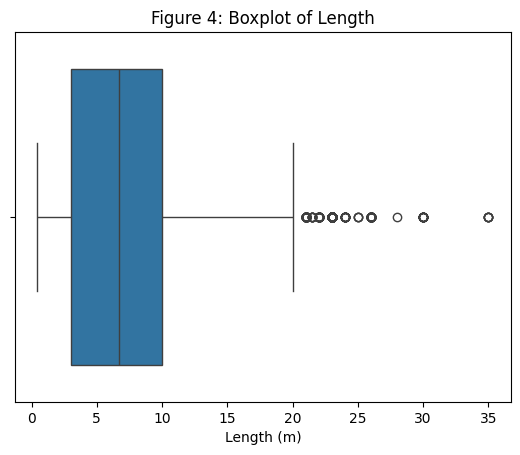

In [191]:
# Plot the distribution of 'length_m'
sns.histplot(dinosaurs['length_m'].dropna(), kde=True)  # kde=True adds a kernel density estimate to the plot
plt.title('Figure 3: Distribution of Length')
plt.xlabel('Length (m)')
plt.ylabel('Frequency')
plt.show()

# Plot boxplot to check for outliers
sns.boxplot(x=dinosaurs['length_m'])
plt.title('Figure 4: Boxplot of Length')
plt.xlabel('Length (m)')
plt.show()

In [192]:
# Check the relation between 'length_m' and 'type'
from scipy.stats import kruskal
dinosaurs_non_missing = dinosaurs.dropna(subset=['length_m'])

# Perform Kruskal-Wallis test
kruskal_result = kruskal(*[dinosaurs_non_missing[dinosaurs_non_missing['type'] == t]['length_m'] for t in dinosaurs_non_missing['type'].unique()])

# Print the Kruskal-Wallis test result
print('Kruskal-Wallis test result:', kruskal_result)

# Check if the p-value is less than 0.05
if kruskal_result.pvalue < 0.05:
    print("The relationship between 'type' and 'length_m' is statistically significant.")
else:
    print("The relationship between 'type' and 'length_m' is NOT statistically significant.")


Kruskal-Wallis test result: KruskalResult(statistic=np.float64(2094.6819662691023), pvalue=np.float64(0.0))
The relationship between 'type' and 'length_m' is statistically significant.


In [193]:
dinosaurs_available_length = dinosaurs[dinosaurs['length_m'].notnull()].copy()
dinosaurs_filled_length = dinosaurs.copy()
dinosaurs_filled_length['length_m'] = dinosaurs_filled_length.groupby('type')['length_m'].transform(lambda x: x.fillna(x.median()))
dinosaurs_filled_length= dinosaurs_filled_length [dinosaurs_filled_length['length_m'].notnull()]

/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1241: RuntimeWarning:

Mean of empty slice



In [194]:
print(dinosaurs_available_length.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3568 entries, 0 to 4949
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  3568 non-null   int64  
 1   name           3568 non-null   object 
 2   diet           3568 non-null   object 
 3   type           3568 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         3568 non-null   float64
 6   min_ma         3568 non-null   float64
 7   region         3568 non-null   object 
 8   lng            3568 non-null   float64
 9   lat            3568 non-null   float64
 10  class          3568 non-null   object 
 11  family         3568 non-null   object 
 12  mid_ma         3568 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 390.2+ KB
None


In [195]:
print(dinosaurs_filled_length.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4042 entries, 0 to 4949
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4042 non-null   int64  
 1   name           4042 non-null   object 
 2   diet           4042 non-null   object 
 3   type           4042 non-null   object 
 4   length_m       4042 non-null   float64
 5   max_ma         4042 non-null   float64
 6   min_ma         4042 non-null   float64
 7   region         4042 non-null   object 
 8   lng            4042 non-null   float64
 9   lat            4042 non-null   float64
 10  class          4042 non-null   object 
 11  family         4042 non-null   object 
 12  mid_ma         4042 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 442.1+ KB
None


## 3. Results
### 3.1. Dinosaurs Diversity in Dataset

The dataset comprises 4,951 records, representing **1,042 unique dinosaur names** (genus name or name of footprint/egg fossil). This shows the **biodiversity of the Mesozoic Era**,  which is also known as the age of reptiles, that began 252.2 million years ago and ended 66 milion years ago, comprising the following periods: </br>
</br>
**Triassic Period**: 252–201 million years ago </br>
**Jurassic Period**: 201–145 million years ago </br>
**Cretaceous Period**: 145–66 million years ago </br>
</br>
Here are some things to know about these periods: </br>

The end of the **Triassic** period was marked by a mass extinction that killed off at least half of all life on Earth. Scientists believe the extinction was caused by a combination of factors, including tectonic shifts, volcanic activity, climate change, and ocean changes. </br>

The **Jurassic** period was a time of warm, wet weather, lush vegetation, and the proliferation of dinosaurs and other animals. </br>

The **Cretaceous** period was a time of global warming and a more equable climate than the present day

As we progress **through geological time**, the **number of records in our dataset increases** significantly. This trend could be attributed to **our enhanced ability to discover fossils** from more recent periods. Further studies are needed to validate these hypotheses. Below is the count of records for each geological period: </br>
**Triassic**:       404 </br>
**Jurassic**      1212</br>
**Cretaceous**   3335</br>

Additionally, the graph in **Figure 5** illustrates the **number of records** and **unique genus names** for every ~9 million years.

In [196]:
print("Original dinosaurs dataset:")
print("Number of rows:", len(dinosaurs))
print("Number of unique names:", dinosaurs['name'].nunique())

Original dinosaurs dataset:
Number of rows: 4951
Number of unique names: 1042


In [197]:
# Define a function to classify periods
def classify_period(row):
    if row['max_ma'] >= 201 and row['min_ma'] <= 252:
        return 'Triassic'
    elif row['max_ma'] >= 145 and row['min_ma'] <= 201:
        return 'Jurassic'
    elif row['max_ma'] >= 66 and row['min_ma'] <= 145:
        return 'Cretaceous'
    else:
        return 'Other'    # For any data points outside of these periods

# Apply the classification function to the dataset
dinosaurs['period'] = dinosaurs.apply(classify_period, axis=1)

dinosaurs.groupby('period').size().sort_values()

period
Triassic       404
Jurassic      1212
Cretaceous    3335
dtype: int64

/tmp/ipykernel_2395/2258997610.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



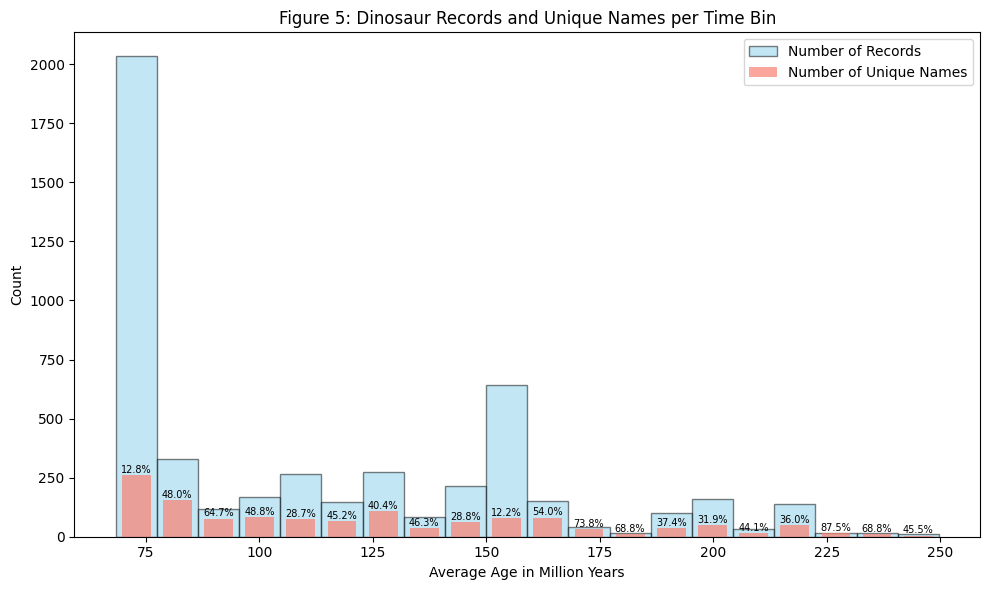

In [198]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram for the number of records (max_ma)
n, bins, patches = ax.hist(dinosaurs['mid_ma'], bins=20, alpha=0.5, label='Number of Records', color='skyblue', edgecolor='black')

# Group by the bins and calculate unique dinosaur names per bin
unique_names_per_bin = dinosaurs.groupby(pd.cut(dinosaurs['mid_ma'], bins=bins))['name'].nunique()

# Calculate the percentage of unique names in each bin
unique_percentage_per_bin = (unique_names_per_bin / n) * 100

# Plot the unique names per bin as bars
# We use the bin centers (midpoints) to place the bars in line with the histogram
bin_centers = 0.5 * (bins[:-1] + bins[1:])
ax.bar(bin_centers, unique_names_per_bin, alpha=0.7, color='salmon', label='Number of Unique Names', width=(bins[1] - bins[0]) * 0.7)

# Add data labels to show the percentage of unique names for each bin
for i in range(len(bin_centers)):
    if n[i] > 0:  # To avoid division by zero for empty bins
        ax.text(bin_centers[i], unique_names_per_bin.iloc[i] + 0.5, f'{unique_percentage_per_bin.iloc[i]:.1f}%', 
                ha='center', va='bottom', fontsize=7, color='black')

# Add labels and title
ax.set_xlabel('Average Age in Million Years')
ax.set_ylabel('Count')
ax.set_title('Figure 5: Dinosaur Records and Unique Names per Time Bin')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


### 3.2. Largest Dinosaurs

***Largest Dinosaurs***</br>
</br>
There are **four Supersaurus and one Argentinosaurus** from the **Sauropod** dinosaur type, which are the largest dinosaurs, measuring **35 meters** in length. </br>
**Figure 6**, the distribution of dinosaur lengths by type, shows that **Sauropods** tend to have significantly larger bodies compared to other types. </br> 
Supersaurus is part of the Diplodocidae family, while the family classification for Argentinosaurus is unavailable. Analyzing the length distribution of Sauropods by family in **Figure 7**, we see that the largest dinosaurs within this group come from the **Brachiosauridae and Diplodocidae** families.

***Handling Records with Missing Length Values***</br>
</br>
Initially, **1383 records had missing length data**, representing about **28%** of the dataset. Through data pre-processing, we **reduced** this **to 18%** by leveraging the relationship between dinosaur type and size, using the median for each type to impute some missing values. This led to the creation of the 'dinosaurs_filled_length' dataset, enabling more comprehensive size-related analysis.
</br>
</br>
However, 18% missing data is still substantial, indicating that there is an issue with our current data collection practices. If we want a more holistic and complete fossil database, this aspect of our process needs to be addressed. It’s crucial to understand why this data is missing in the first place and implement improvements in how fossil data is gathered.
</br>
</br>
To address this, one immediate action is to fill in the missing 'type' and 'family' fields based on the dinosaur names. Since most dinosaur classifications are well-documented, we can cross-reference public datasets or consult online sources to accurately assign these categories.
</br>
</br>
As for the missing length values, we must be cautious when imputing data. Because when more than 15% of the data is missing, imputation can introduce bias, and the imputed values may not represent the true distribution. Alternatively we can
1- Analyzing only complete cases (records without missing length data). </br>
2- Using advanced modeling techniques (e.g., multiple imputation or machine learning methods that handle missing data).</br>
3- Acquiring additional data to supplement the gaps in the fossil records</br>
</br>
Additionally, we should initiate the collection of more comprehensive features for each fossil, such as the age of the dinosaur, its sex, and relevant information regarding its health and nutrition. By gathering these details, we will enhance our ability to accurately model missing data, especially in cases where the amount of missing information is substantial.

In [199]:
largest_dinosaurs = dinosaurs_filled_length[dinosaurs_filled_length['length_m']==dinosaurs_filled_length['length_m'].max()]
print(largest_dinosaurs)

      occurrence_no             name         diet      type  length_m  max_ma  \
570          465134      Supersaurus  herbivorous  sauropod      35.0   155.7   
924          489575      Supersaurus  herbivorous  sauropod      35.0   155.7   
1165         513500  Argentinosaurus  herbivorous  sauropod      35.0    99.6   
1423         541209      Supersaurus  herbivorous  sauropod      35.0   157.3   
1972         693186      Supersaurus  herbivorous  sauropod      35.0   157.3   

      min_ma       region         lng        lat       class        family  \
570    145.0     Colorado -108.397202  38.583099  Saurischia  Diplodocidae   
924    145.0  Estremadura   -9.343696  39.216393  Saurischia  Diplodocidae   
1165    89.8      Neuquén  -69.059998 -38.916672  Saurischia          NULL   
1423   145.0     Colorado -109.036133  39.200081  Saurischia  Diplodocidae   
1972   145.0      Wyoming -105.439041  42.629375  Saurischia  Diplodocidae   

      mid_ma  
570   150.35  
924   150.35  

In [200]:
# Calculate the number of missing values in 'length_m'
missing_length_before = dinosaurs['length_m'].isna().sum()
total_rows = dinosaurs.shape[0]

# Calculate the number of rows after imputation
missing_length_after = total_rows - dinosaurs_filled_length.shape[0]

# Print the number of missing values and the percentages
print("Number of rows missing length value before imputation:", missing_length_before)
print(f"Percentage of rows missing length value before imputation: {100 * missing_length_before / total_rows:.2f}%")

print("Number of rows with missing length values after imputation:", missing_length_after)
print(f"Percentage of rows missing length value after imputation: {100 * missing_length_after / total_rows:.2f}%")


Number of rows missing length value before imputation: 1383
Percentage of rows missing length value before imputation: 27.93%
Number of rows with missing length values after imputation: 909
Percentage of rows missing length value after imputation: 18.36%


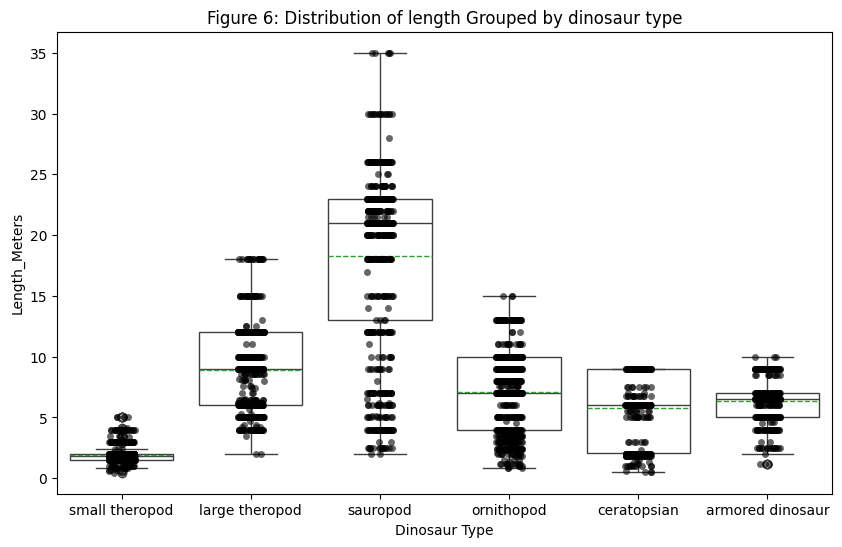

In [201]:
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='type', y='length_m', data= dinosaurs_filled_length, showmeans=True, meanline=True,
            boxprops={'facecolor':'None'})  # Add mean line and show mean

# Overlay a stripplot to show all data points
sns.stripplot(x='type', y='length_m', data=dinosaurs_filled_length, jitter=True, color='black', alpha=0.6)

# Add a title and labels
plt.title('Figure 6: Distribution of length Grouped by dinosaur type')
plt.xlabel('Dinosaur Type')
plt.ylabel('Length_Meters')

# Show the plot
plt.show()

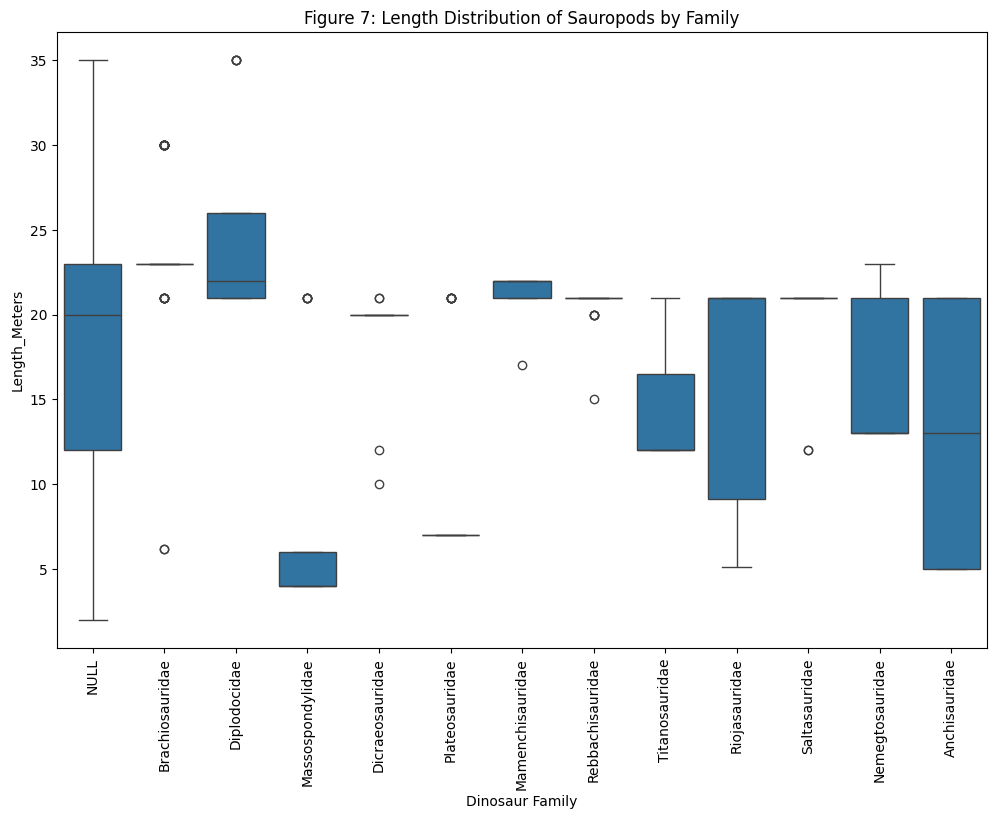

In [202]:
sauropod= dinosaurs_filled_length[dinosaurs_filled_length['type']== 'sauropod']
plt.figure(figsize=(12, 8))
sns.boxplot(x='family', y='length_m', data=sauropod)
plt.title('Figure 7: Length Distribution of Sauropods by Family')
plt.xlabel('Dinosaur Family')
plt.ylabel('Length_Meters')
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.show()


### 3.3. Dinosaurs with Most Frequency

Based on the bar plot shown in **Figure 8**, **Ornithopod** type with **904** records has the most occurrences in this dataset.
We can see that the null values are more than any type, once again emphasizing that there is a need to complete the dataset. 
but among the ones that we have the data for Ornithopod with 18.3% has the most frequensy **following closely by large and small Theropods** and **Saurapods**. </br>
**Ceratopsian** and **Armored Dinosaur** has the **lowest frequency**.
</br>
</br>
The sunburst chart (**Figure 9**) clearly highlights the dominance of the **Saurischia class** or "lizard-hipped" dinosaurs and effectively visualizes the distribution of each type, family, and individual name within the hierarchy.

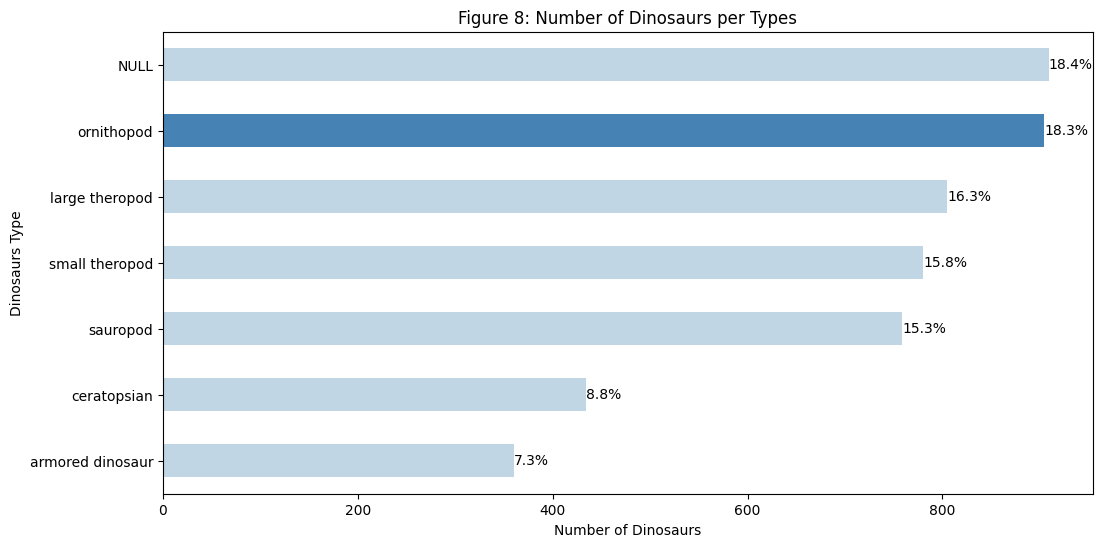

In [203]:
type_counts = dinosaurs['type'].value_counts()
type_percentages = (type_counts / type_counts.sum()) * 100

# Identify the type with the highest count (excluding "NULL")
top_type = type_counts[type_counts.index != 'NULL'].idxmax()

# Create a color list: bold color for the top type, faded for others
colors = ['#C0D6E4' if type != top_type else 'steelblue' for type in type_counts.index]

# Create a bar chart
plt.figure(figsize=(12, 6))
type_counts.plot(kind='barh',color = colors)

# Add titles and labels
plt.title('Figure 8: Number of Dinosaurs per Types')
plt.xlabel('Number of Dinosaurs')
plt.ylabel('Dinosaurs Type')

# Annotate each bar with the percentage of the total count
for index, (count, percentage) in enumerate(zip(type_counts.values, type_percentages)):
   plt.text(count + 0.2, index, f'{percentage:.1f}%', va='center', fontsize=10)

# Reverse the y-axis to display the highest count at the top
plt.gca().invert_yaxis()

plt.show()

In [204]:
import plotly.express as px
# Create a sunburst chart
fig = px.sunburst(dinosaurs, path=['class', 'type', 'family','name'])
fig.update_layout(
    width=600,  
    height=600,
        title_text='Figure 9: Dinosaur Categories Sunburst Chart',
        title_x=0.5 
)
fig.show()

### 3.4. Dinosaurs' Size Trend


There is a **weak positive correlation** (0.31) between the age of dinosaurs and their body size, indicating that larger dinosaurs are generally associated with older geological periods. This suggests that over time, the length of dinosaurs has **decreased**.

The R-squared value of 0.1 indicates that only about **10% of the variability** in dinosaur length **can be explained by their age**. Although this is relatively low, the **very small p-value** confirms that the observed relationship between age and dinosaur length is **statistically significant**, meaning it is highly unlikely to be due to chance.

For this analysis, we used the dinosaurs_available_length dataset to avoid introducing bias from imputing missing values with the median, ensuring we accurately capture trends over time without distorting the data.

Recognizing that body size is also influenced by dinosaur type, we further refined our analysis in **Figure 11** by grouping dinosaurs by type and performing **separate regression analyses for each group**. This provided more detailed insights into how body size trends evolved within specific dinosaur types. Notably, **Ceratopsians** showed the strongest relationship with age, with an R-squared value of **0.48**.

Different types of dinosaurs experienced **divergent evolutionary trends**. For example, Ceratopsians, Sauropods, and Ornithopods grew larger over time, while Theropods (both large and small) and Armored Dinosaurs exhibited a trend of becoming smaller.

This suggests that while age does play a role in dinosaur size, **other factors** such as environmental changes, predator-prey dynamics and evolutionary pressures likely have a stronger influence on dinosaur body size throughout evolution, and further investigation is required to fully understand these relationships.

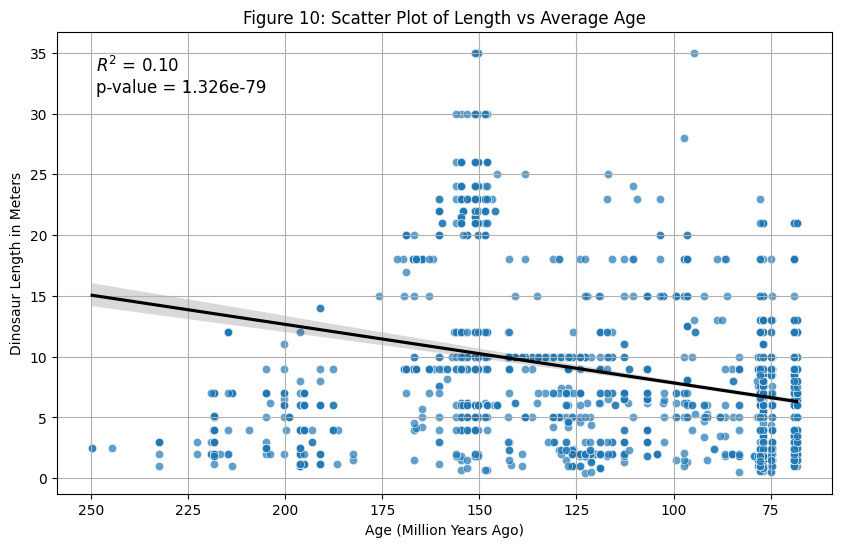

Line formula: y = 0.05 * x + 3.02
Correlation between average age and length: 0.31


In [205]:
from scipy.stats import linregress

#Calculate the average age of dinosaurs
# dinosaurs_available_length ['mid_ma'] = (dinosaurs_available_length ['max_ma']+ dinosaurs_available_length ['min_ma'])/2

# Perform linear regression to get the slope, intercept, r-value (correlation), etc.
slope, intercept, r_value, p_value, std_err = linregress(dinosaurs_available_length['mid_ma'],dinosaurs_available_length['length_m'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='mid_ma', y='length_m', data=dinosaurs_available_length, alpha=0.7)

# Plot the regression line
sns.regplot(x='mid_ma', y='length_m', data=dinosaurs_available_length, scatter=False, color='black', line_kws={"label": f"$R^2$ = {r_value**2:.2f}"})

# Add titles and labels
plt.title('Figure 10: Scatter Plot of Length vs Average Age')
plt.xlabel('Age (Million Years Ago)')
plt.ylabel('Dinosaur Length in Meters')
plt.grid(True)

# Add correlation and p-value text to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_value**2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'p-value = {p_value:.3e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Invert the x-axis to make it descending
plt.gca().invert_xaxis()

# Display the scatter plot
plt.show()

# Print the line formula
print(f"Line formula: y = {slope:.2f} * x + {intercept:.2f}")
# Print the correlation between mid_ma and length_m
print(f"Correlation between average age and length: {r_value:.2f}")

/tmp/ipykernel_2395/3688853221.py:7: UserWarning:

The palette list has more values (8) than needed (6), which may not be intended.



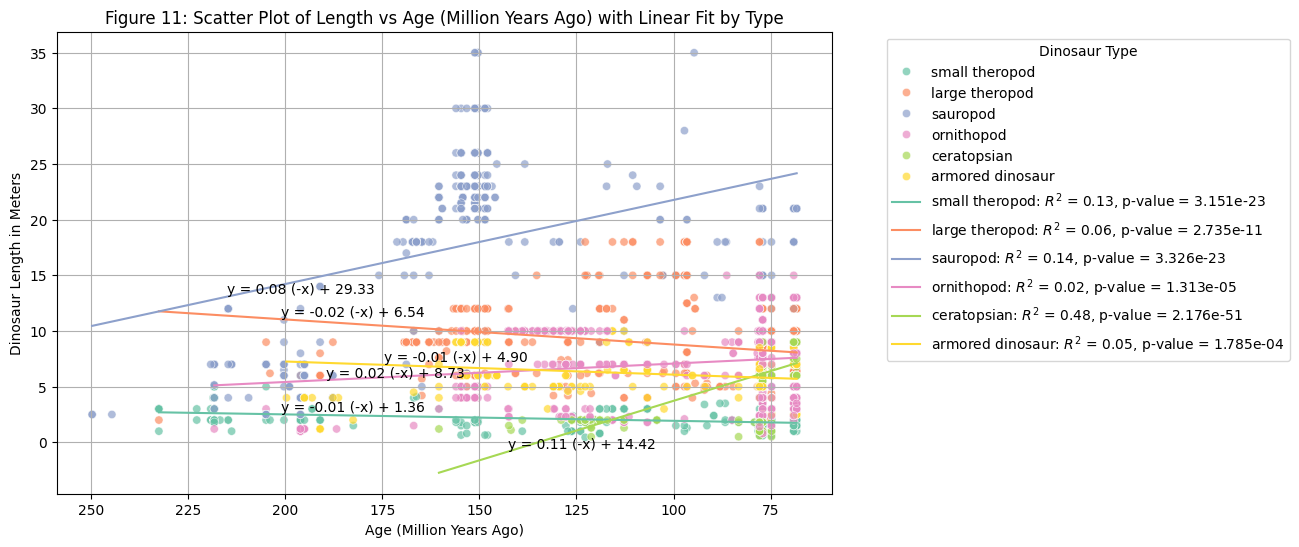

In [206]:
# Iterate through each type to fit a linear regression and plot
types = dinosaurs_available_length['type'].unique()
palette = sns.color_palette('Set2')  # Define the color palette for types

# Set up the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mid_ma', y='length_m', hue='type', data=dinosaurs_available_length, palette=palette, alpha=0.7)

for idx, dinosaur_type in enumerate(types):
    # Filter the data for the current type
    type_data = dinosaurs_available_length[dinosaurs_available_length['type'] == dinosaur_type]
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(type_data['mid_ma'], type_data['length_m'])
    
    # Create the regression line data
    x_range = np.linspace(type_data['mid_ma'].min(), type_data['mid_ma'].max(), 100)
    y_range = slope * x_range + intercept
    
    # Plot the regression line
    plt.plot(x_range, y_range , color=palette[idx], label=f'{dinosaur_type}: $R^2$ = {r_value**2:.2f}, p-value = {p_value:.3e}')
# Adjust the slope for the inverted x-axis
    adjusted_slope = -slope
    # Create the adjusted formula text
    formula_text = f'y = {adjusted_slope:.2f} (-x) + {intercept:.2f}'
    # Place the text on the line, adjusting position if necessary
    plt.text(x_range[int(len(x_range) * 0.8)], y_range[int(len(y_range) * 0.8)], formula_text,
             color='black', fontsize=10, verticalalignment='bottom')

# Add titles and labels
plt.title('Figure 11: Scatter Plot of Length vs Age (Million Years Ago) with Linear Fit by Type')
plt.xlabel('Age (Million Years Ago)')
plt.ylabel('Dinosaur Length in Meters')
plt.grid(True)

# Invert the x-axis to make it descending
plt.gca().invert_xaxis()

# Show legend
plt.legend(title="Dinosaur Type", loc='upper right', bbox_to_anchor=(1.6, 1))

# Display the scatter plot
plt.show()

### 3.5. Interactive map showing each record


The interactive dinosaur fossil map reveals **significant fossil density** in the following regions:

1. The **Western-Central United States** (Montana, Wyoming, Colorado, Utah, New Mexico, Arizona) and **Alberta, Canada**.</br>
2. **Western Europe** (mainly England, France, Spain, and Germany).</br>
3. **China** and **Mongolia**.</br>
4. **Argentina** in South America.</br>
</br>
</br>
This **highlights** the abundance of **dinosaur habitats** in certain regions but also **underscores** that **fossil records** from many areas, particularly **Africa and the Middle East**, are **incomplete** compared to those from North America and Europe. The disparity is likely due to **uneven paleontological efforts**, with far fewer fossil digs and discoveries in these underrepresented regions. This suggests that the true **diversity of dinosaurs in these areas remains largely unknown** and could be significantly greater than current fossil evidence indicates.</br>
</br>
Each map has been **color-coded** based on different categories, providing valuable insights into various aspects of dinosaur distribution:
</br>
**Figure 12**: Geological Period</br>
**Figure 13**: Dinosaur Diet</br>
**Figure 14**: Dinosaur Type</br>

**Insights from Each Map**:
* Figure 12 (**Geological Period**): This map shows the **geographical shift** in dinosaur populations over time. For instance, **in the United States**, dinosaurs seem to have **gradually moved northward**, with Canada containing primarily Cretaceous fossils (most recent geological period). 
The Western Interior Seaway[2] that once split North America during the Cretaceos period supports this hypothesis- many dinosaurs in this region are from the late Cretaceos.
In **Southern Africa**, records are mostly from the **Triassic and Jurassic** periods. However this **underrepresentation of Cretaceos period in Africa** could be due to fossil collection efforts rather than an absence of dinosaurs from this time.
Western Europe and Eastern Asia also show distinct patterns of population movement across geological periods.

* Figure 13 (**Diet**): **Herbivorous** dinosaurs **dominate** the fossil records globally, while **omnivorous** dinosaurs are **relatively rare**. **Africa**, however, stands out for **having a higher prevalence of carnivorous and omnivorous** fossils compared to other continents. 
while the African fossil record is incomplete compared to North America and Europe, **it's possible that carnivorous dinoasurs left more remains because their skeletal structures were often sturdier**. 

* Figure 14 (**Type**): This map allows users to zoom into each region to explore the **diversity of dinosaur types** found in specific areas.

**Important Notes**:
* For Figure 13 (Diet), we have removed fossils with missing data on diet to provide a clearer distribution.
* For Figure 14 (Type), fossils with missing type data have been excluded for clarity.
* Remember, dinosaurs lived in a world where supercontinents like Pangaea and later Gondwana and Laurasia existed, and their movement across time and space was influenced by plate tectonics.

**User Guide**:
* **Each point** on the map represents **one fossil record**.
* **Hover over** a point to see detailed information about the fossil, including its type, length, region, geological period, name, and class.
* **Zoom in or out** using your mouse scroll wheel or the map's zoom buttons. You can also click and drag to **pan** and explore different regions.</br>

[2]*The Western Interior Seaway was a body of water that split North America during the late Cretaceous period, which shaped the distribution of fossils in that region.*

In [207]:
import plotly.express as px
# Create an interactive scatter geo map
fig = px.scatter_geo(
    dinosaurs,
    lat='lat',
    lon='lng',
    hover_name='name',
      hover_data={
        'occurrence_no': True,
        'lat': False,
        'lng':False,
        'type':True,
        'length_m':True,
        'region': True,
        'period':True,
        'name':True,
        'class': True
    },
    color='period',  
    color_discrete_sequence=px.colors.qualitative.Dark2,
    title="Figure 12: Dinosaur Fossils Map Distribution per Geological Period",
    category_orders={'period': ['Triassic', 'Jurassic', 'Cretaceous']},
    opacity=0.5 
)

# Customize map appearance
fig.update_geos(
    showland=True, landcolor="lightgray",
    showcountries=True, countrycolor="white"
)

# Adjust layout for better visibility
fig.update_layout(
    title_x=0.5,
    title_y=0.95,
    margin={"r":0,"t":0,"l":0,"b":0},
    height=600,
     legend=dict(
        y=0.8 
    )
);

<p align = "center">
<img src="./Fig12-Map-Geological-Period.png" alt="Geological Period Map" width="1000"/>
</p>

In [208]:
diet_available= dinosaurs[dinosaurs['diet']!='NULL']
diet_color_map = {
    'herbivorous': 'darkgreen',  
    'carnivorous': 'darkred',     
    'omnivorous': 'purple'    
}
# Create an interactive scatter geo map
fig = px.scatter_geo(
    diet_available,
    lat='lat',
    lon='lng',
    hover_name='name',
      hover_data={
        'occurrence_no': True,
        'region': True,
        'class': True,
        'type':True,
        'length_m':True,
        'min_ma':True
    },
    color='diet',  
    color_discrete_map=diet_color_map,  
    title="Figure 13: Dinosaur Fossils Map Diet Ditribution",
    opacity=0.5 
)

# Customize map appearance
fig.update_geos(
    showland=True, landcolor="lightgray",
    showcountries=True, countrycolor="white"
)

# Adjust layout for better visibility
fig.update_layout(
    title_x=0.5,
    title_y=0.95,
    margin={"r":0,"t":0,"l":0,"b":0},
    height=600,
     legend=dict(
        y=0.8 
    )
);

<p align = "center">
<img src="./Fig13-Map-Diet.png" alt="Map Diet" width="1000"/>
</p>

In [209]:
type_available= dinosaurs[dinosaurs['type']!='NULL']

# Create an interactive scatter geo map
fig = px.scatter_geo(
    type_available,
    lat='lat',
    lon='lng',
    hover_name='name',
      hover_data={
        'occurrence_no': True,
        'region': True,
        'class': True,
        'type':True,
        'length_m':True,
        'diet':True,
        'period':True
    },
    color='type',  
    color_discrete_sequence=px.colors.qualitative.Set1,
    title="Figure 14: Dinosaur Fossils Map Distribution per Dinosaur Type",
    opacity=0.5 
)

# Customize map appearance
fig.update_geos(
    showland=True, landcolor="lightgray",
    showcountries=True, countrycolor="white"
)

# Adjust layout for better visibility
fig.update_layout(
    title_x=0.5,
    title_y=0.95,
    margin={"r":0,"t":0,"l":0,"b":0},
    height=600,
     legend=dict(
        y=0.8 
    )
);

<p align = "center">
<img src="./Fig14-Map-Type.png" alt="Map Type" width="1000"/>
</p>

### 3.6. **Other insights from analysis** 


#### 1. Dinosaurs Type and Age Relation

Our fossil records **encompass the entire Mesozoic Era**, dating back to the oldest known fossil, which is approximately **252.2 million years old**, and extending to the youngest fossil, recorded at around **66 million years ago**.</br>
In the table below, we observe that the only dinosaur type dating back older than 237 million years is the Sauropod. Conversely, the Ceratopsian is the only dinosaur type that is never older than 163.5 million years. This observation is aligned with established paleontological knowledge. **Sauropods** are known to be some of **the earliest large dinosaurs**, with fossils dating back to the Late Triassic (around 230 million years ago). **Ceratopsians**, including well-known dinosaurs like Triceratops, are generally **associated with the Late Cretaceous** period, with fossils appearing around 160 million years ago and becoming more prevalent in the last 20 million years of the Cretaceous. 

**Figure 15** illustrates the **density of various dinosaur types over their average ages**. Notably, the fossil record density for most dinosaur types peaks around 75 million years ago. **75 million years ago** corresponds to the **Late Cretaceous** period when **many dinosaur species thrived and diversified**. **Sauropods** exhibit a different trend, with their peak density occurring approximately **150 million years ago** which aligns with the **Late Jurassic period**, a time when these dinosaurs were particularly abundant.


In [210]:
dinosaurs.groupby('type').agg(
    min_ma=('min_ma', 'min'),
    max_ma=('max_ma', 'max')
).sort_values('max_ma')

,min_ma,max_ma
type,,
ceratopsian,66.0,163.50
armored dinosaur,66.0,208.50
ornithopod,66.0,228.00
large theropod,66.0,237.00
small theropod,66.0,237.00
NULL,66.0,247.20
sauropod,66.0,252.17


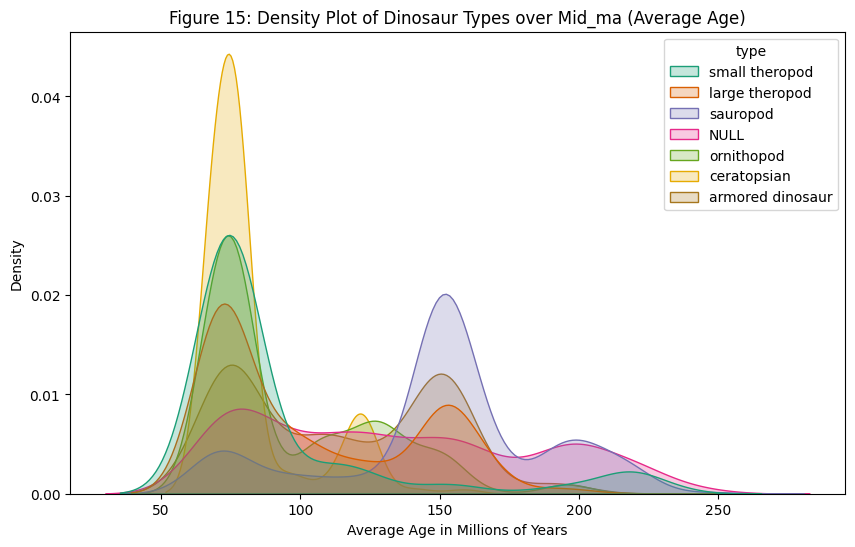

In [211]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Create a density plot per dinosaur type over mid_ma
sns.kdeplot(
    data=dinosaurs, 
    x='mid_ma', 
    hue='type', 
    fill=True, 
    common_norm=False,  # Ensures each type has its own density scale
    palette='Dark2',    # You can choose other color palettes too
)

# Customize the plot
plt.title('Figure 15: Density Plot of Dinosaur Types over Mid_ma (Average Age)')
plt.xlabel('Average Age in Millions of Years')
plt.ylabel('Density')

# Display the plot
plt.show()

#### 2. Dinosaurs Length Distribution
**Figure 16** illustrates a histogram of dinosaur lengths, revealing that the majority of dinosaurs (**~77%**) were shorter or equal to 10 meters long.

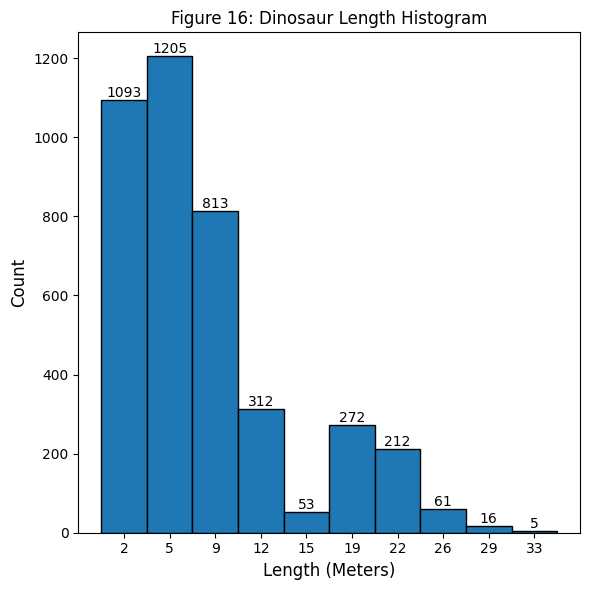

In [212]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Define the number of bins
bins = 10

# Plot the histogram with a color palette
hist_values, bin_edges, _ = ax.hist(dinosaurs_filled_length['length_m'], bins=bins, color='#1f77b4', edgecolor='black')

# Add title and labels with a larger font size
plt.title('Figure 16: Dinosaur Length Histogram')
plt.xlabel('Length (Meters)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Disable grid lines for clarity
plt.grid(False)

# Add data labels on top of each bar with improved formatting
for i, patch in enumerate(ax.patches):
    height = patch.get_height()
    if height > 0:  # Only label bars that have height
        plt.text(patch.get_x() + patch.get_width() / 2., 
                 height, 
                 f'{int(height)}', 
                 ha='center', 
                 va='bottom', 
                 fontsize=10, 
                 color='black')

# Calculate midpoints for x-ticks and set them
midpoints = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]
ax.set_xticks(midpoints)  # Set the x-ticks to midpoints
ax.set_xticklabels([f'{int(m):d}' for m in midpoints])  # Format midpoints as integers

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [213]:
# Step 1: Filter dinosaurs with length less than 10 meters
dinosaurs_less_than_10 = dinosaurs_filled_length[dinosaurs_filled_length['length_m'] <= 10]

# Step 2: Calculate the percentage
percentage_less_than_10 = (len(dinosaurs_less_than_10) / len(dinosaurs_filled_length)) * 100
print(percentage_less_than_10)

76.96684809500248


#### 3. Dinosaurs Diet & Class


**Figure 17** illustrates that the **majority** (53%) of the dinosaurs in our dataset belong to the **Saurischia class**, in contrast to the Ornithischia class. As previously mentioned, **all dinosaurs classified under Ornithischia** are **herbivorous**. However, **within the Saurischia class**, among the records with a specified diet, **61.8% are carnivorous**. Additionally, the rarest diet observed in our dataset is omnivorous.

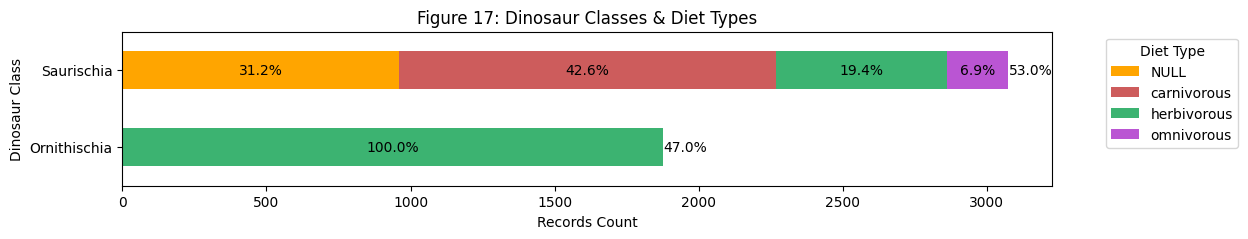

In [214]:
diet_color_map = {
    'herbivorous': 'mediumseagreen',  
    'carnivorous': 'indianred',     
    'omnivorous': 'mediumorchid',
    'NULL':'orange'
}

# Calculate the counts for each class and diet type
class_diet_counts = dinosaurs.groupby(['class', 'diet']).size().unstack()

# Calculate the percentage for each diet type within each class
class_diet_percentages = class_diet_counts.div(class_diet_counts.sum(axis=1), axis=0) * 100

# Calculate the total percentage for each class
class_total_counts = diet_available['class'].value_counts()
class_total_percentages = (class_total_counts / class_total_counts.sum()) * 100

# Plot a stacked horizontal bar chart
ax = class_diet_counts.plot(kind='barh', stacked=True, figsize=(12, 2), color = diet_color_map)

# Add data labels in front of each bar for total class percentage
for i, class_label in enumerate(class_diet_counts.index):
    percent = class_total_percentages[class_label]
    class_x_position = class_diet_counts.loc[class_label].sum()  # Total width of the current class bar
    ax.text(class_x_position + 2, i, f'{percent:.1f}%', va='center', ha='left', color='black')

# Add data labels for diet percentages within each section of the bars
for i, (class_label, row) in enumerate(class_diet_counts.iterrows()):
    for j, diet_type in enumerate(row.index):
        if row[diet_type] > 0:  # Avoid division by zero
            diet_percent = (row[diet_type] / class_diet_counts.loc[class_label].sum()) * 100
            # Calculate the x position for the label
            x_position = row[:j + 1].sum() - (row[diet_type] / 2)  # Position it in the middle of the section
            ax.text(x_position, i, f'{diet_percent:.1f}%', va='center', ha='center', color='black')
            
# Add titles and labels
plt.title('Figure 17: Dinosaur Classes & Diet Types')
plt.xlabel('Records Count')
plt.ylabel('Dinosaur Class')
plt.legend(title='Diet Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### 4. Regions with Most Dinosaur Fossil Records

**North America** boasts the highest fossil representation in our dataset, with **Alberta, Canada** contributing 13.1% of the total fossils. Additionally, the U.S. states of **Wyoming** and **Montana** follow closely behind, accounting for 10.4% and 9% of the fossil representation, respectively.



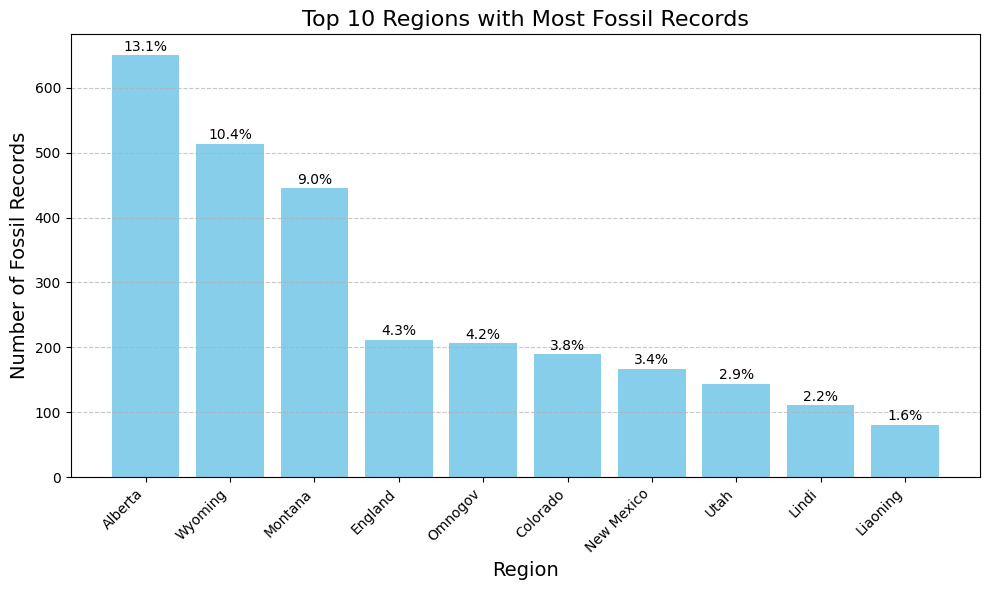

In [215]:
# Count the number of fossil records for each region
region_counts = dinosaurs['region'].value_counts()

# Get the top 10 regions
top_10_regions = region_counts.head(10)

# Calculate the total number of records
total_records = region_counts.sum()

# Calculate the percentage for each region
top_10_percentages = (top_10_regions / total_records) * 100

# Set up the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_regions.index, top_10_regions.values, color='skyblue')

# Add titles and labels
plt.title('Top 10 Regions with Most Fossil Records', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Fossil Records', fontsize=14)

# Add percentage labels on top of each bar
for bar, percentage in zip(bars, top_10_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid lines
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()



## 4. Conclusion
### 4.1 Insights
This analysis provides valuable insights into the Mesozoic era, drawing on the extensive data from the Paleobiology Database, which contains 4,951 records and 1,042 unique dinosaur species. The dataset reveals that North America, Western Europe, and Eastern Asia offer the most complete fossil records. Dinosaur lengths range from 0.45 to 35 meters, with Sauropods being the largest, containing dinosuars that exceed 18 meters in length. Different dinosaur types exhibit varying size trends over time. While age influences body size, factors such as environmental changes, predator-prey dynamics, and evolutionary pressures likely have a more substantial impact on dinosaur size evolution. Ornithopods with 18.3% are the most frequent dinosaur type in our dataset.

The dataset indicates that North America has the highest fossil representation, particularly from Alberta, Wyoming, and Montana. In contrast, regions like Africa, the Middle East, and Russia have significantly fewer records. This disparity may stem from more extensive paleontological research and excavation efforts in North America, as well as favorable geological conditions that supported diverse dinosaur habitats during the Mesozoic Era. Conversely, the limited records in Africa and other regions could be due to less exploration, unfavorable fossil preservation conditions, or historical research biases.

Our findings also suggest a geographical shift in dinosaur populations over time. In the United States, dinosaurs appear to have gradually moved northward, with Canada yielding primarily Cretaceous fossils. The Western Interior Seaway that once divided North America supports this hypothesis, indicating that many dinosaurs in the region are from the late Cretaceous. In Southern Africa, most records date back to the Triassic and Jurassic periods, and the underrepresentation of the Cretaceous in Africa may reflect gaps in fossil collection rather than an absence of dinosaurs during that time.

Globally, herbivorous dinosaurs dominate the fossil records, while omnivorous species are relatively rare. However, Africa stands out for its higher prevalence of carnivorous and omnivorous fossils compared to other continents. This suggests that carnivorous dinosaurs, with sturdier skeletal structures, may have left more remains, despite the African fossil record being less complete than those of North America and Europe.

In summary, these insights underscore the importance of continued research and exploration in paleontology. Addressing gaps in fossil records and understanding the factors contributing to the distribution of dinosaur fossils will enhance our knowledge of these fascinating creatures and their evolutionary history.

### 4.2 Recommendations for Data Quality Improvement

1. **Investigate Missing Data Reasons**: It is essential to identify the underlying reasons for missing values in the 'type', 'length_m', and 'diet' features. The significant gaps in our dataset indicate potential issues with current data collection practices. Understanding why this data is missing will enable us to implement improvements and achieve a more holistic and complete fossil database.

2. **Immediate Data Completion Actions**: As an immediate action, we recommend filling in the missing 'type' and 'family' fields based on the dinosaur names. Since most dinosaur classifications are well-documented, we can cross-reference public datasets or consult online sources to accurately assign these categories.

3. **Cautious Imputation for Length Values**: For missing length values, caution is warranted. When more than 15% of the data is missing, imputation can introduce bias, and the imputed values may not accurately represent the true distribution. Therefore, we suggest the following approaches:

- Employ advanced modeling techniques, such as multiple imputation or machine learning methods that effectively handle missing data.
- Acquire additional data to supplement the gaps in the fossil records.
4. **Enhance Data Collection**: We should initiate the collection of more comprehensive features for each fossil, such as the age of the dinosaur, its sex, and relevant information regarding its health and nutrition. By gathering these details, we will enhance our ability to accurately model missing data, especially concerning length. Developing a predictive model for estimating length can address challenges associated with fossils that lack this specific information.

5. **Target Underrepresented Regions**: Focus on areas with fewer records, such as Africa, the Middle East, and Russia. While these regions may not have been optimal habitats for dinosaurs, understanding their fossil records can provide insights into historical research limitations, geological factors, or environmental conditions affecting dinosaur preservation.

6. **Study Favorable Geographies**: Analyze the geographies with the highest dinosaur records to identify factors contributing to the success of dinosaur populations. This investigation can inform future paleontological efforts, guiding researchers to areas likely to yield new fossil discoveries.

7. **Implementation Strategy and Success Metrics**: Prioritize the recommendations based on feasibility, potential impact, and resource requirements. For instance, addressing the reasons for missing data should be the initial focus, followed by completing gaps and enhancing data collection practices. To evaluate the success of these recommendations, we will establish metrics such as the percentage of missing data reduced, improvements in data completeness, and the quality of newly gathered information.

## 5. Resource
1. [Paleobiology Database](https://paleobiodb.org/#/)
2. [University of California Museum of Paleontology](https://ucmp.berkeley.edu/) </br>
2. ChatGPT: Code Generator, Brainstormer